In [1]:
def bfs(g,goal=-1):
    q=[]
    vis=[0 for i in range(len(g))]
    for i in range(1,len(g)):
        if not vis[i]:
            q.append(i)
            vis[i]=1
            while len(q):
                u=q.pop(0)
                if goal==-1:
                    print(u) # bfs order
                else:
                    if u==goal: # find goal
                        return
                for v in g[u]:
                    if not vis[v]:
                        vis[v]=1
                        q.append(v)


In [2]:
def dfs(g,goal=-1):
    st=[]
    vis=[0 for i in range(len(g))]
    for i in range(1,len(g)):
        if not vis[i]:
            st.append(i)
            vis[i]=1
            while len(st):
                u=st.pop()
                if goal==-1: # dfs order
                    print(u)
                else:
                    if u==goal: # find goal
                        return
                for v in g[u]:
                    if not vis[v]:
                        vis[v]=1
                        st.append(v)
    

In [3]:
# 1
n,m=map(int,input().strip().split())
g=[[] for i in range(n+1)]

for i in range(m):
    u,v=map(int,input().strip().split())
    g[u].append(v)
    g[v].append(u)
print("BFS order: ")
bfs(g)
print("DFS order: ")
dfs(g)

2 1
1 2
BFS order: 
1
2
DFS order: 
1
2


1000 0.00071 0.00031
40000 0.00335 0.00264
80000 0.01059 0.00624
200000 0.01162 0.01214
1000000 3.18605 0.14721


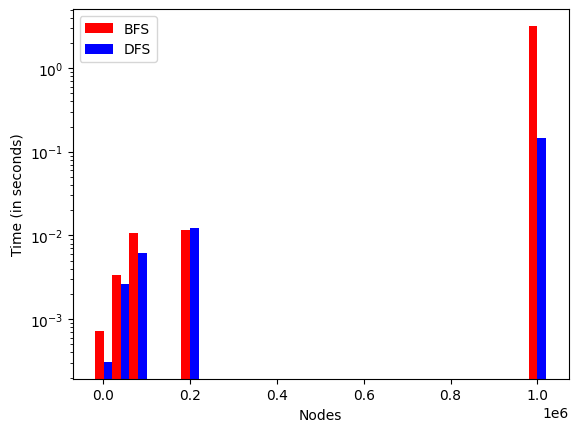

In [24]:
# 2
from random import shuffle
import time
def gen(n):
    a=[i for i in range(1,n+1)]
    shuffle(a)
    return a
def build(a):
    g=[[0,0] for i in range(len(a)+1)]
    root=a[0]
    for i in range(1,len(a)):
        curr=root
        while 1:
            x=(a[i]>curr)
            if g[curr][x]==0:
                g[curr][x]=a[i]
                break
            curr=g[curr][x]
    return g
lim=[1000,40000,80000,200000,1000000]
bfsTimes=[]
dfsTimes=[]
for l in lim:
    a=gen(l)
    g=build(a)
    start=time.time()
    bfs(g,a[-220])
    end=time.time()
    bfsTimes.append(end-start)
    start=time.time()
    dfs(g,a[-220])
    end=time.time()
    dfsTimes.append(end-start)
for i,j,k in zip(lim,bfsTimes,dfsTimes):
    print(i,round(j,5),round(k,5))

import matplotlib.pyplot as plt
plt.bar([i-10000 for i in lim],bfsTimes,20000,color='r',log=True,label='BFS')
plt.bar([i+10000 for i in lim],dfsTimes,20000,color='b',log=True,label='DFS')
plt.xlabel('Nodes')
plt.ylabel('Time (in seconds)')
plt.legend()
plt.show()

In [11]:
# 3
from binarytree import build

g=[[],[None,2],[None,None],[2,None],[1,6],[None,None],
   [5,None],[4,9],[None,None],[8,None],[7,12],[None,None],
   [11,None],[10,15],[None,None],[14,None]]
vals=[None for i in range(100)]
vals[0]=13
for i in range(len(vals)):
    if vals[i]:
        vals[2*i+1]=g[vals[i]][0]
        vals[2*i+2]=g[vals[i]][1]
root=build(vals)
print(root)

from anytree import Node, RenderTree

node=[0 for i in range(16)]
node[13]=Node(13)
node[10]=Node(10,parent=node[13])
node[15]=Node(15,parent=node[13])
node[7]=Node(7,parent=node[10])
node[12]=Node(12,parent=node[10])
node[14]=Node(14,parent=node[15])
node[4]=Node(4,parent=node[7])
node[9]=Node(9,parent=node[7])
node[11]=Node(11,parent=node[12])
node[1]=Node(1,parent=node[4])
node[6]=Node(6,parent=node[4])
node[8]=Node(8,parent=node[9])
node[3]=Node(3,parent=node[1])
node[5]=Node(5,parent=node[6])
node[2]=Node(2,parent=node[1])


# print the tree
for pre, fill, node in RenderTree(node[13]):
    print(f"{pre}{node.name}")

from treelib import Node, Tree

tree = Tree()
node = [0 for i in range(16)]
node[13] = tree.create_node(13, 13)
node[10] = tree.create_node(10, 10, parent=node[13])
node[15] = tree.create_node(15, 15, parent=node[13])
node[7] = tree.create_node(7, 7, parent=node[10])
node[12] = tree.create_node(12, 12, parent=node[10])
node[14] = tree.create_node(14, 14, parent=node[15])
node[4] = tree.create_node(4, 4, parent=node[7])
node[9] = tree.create_node(9, 9, parent=node[7])
node[11] = tree.create_node(11, 11, parent=node[12])
node[1] = tree.create_node(1, 1, parent=node[4])
node[6] = tree.create_node(6, 6, parent=node[4])
node[8] = tree.create_node(8, 8, parent=node[9])
node[3] = tree.create_node(3, 3, parent=node[1])
node[5] = tree.create_node(5, 5, parent=node[6])
node[2] = tree.create_node(2, 2, parent=node[1])
tree.show()

from graphviz import Graph

d=Graph()
for i in range(1,16):
    for j in range(2):
        if g[i][j]:
            d.edge(str(i),str(g[i][j]))
            
print(d)



                  _______13___
                 /            \
            ____10___         _15
           /         \       /
      ____7__        _12    14
     /       \      /
  __4__       9    11
 /     \     /
1       6   8
 \     /
  2   5

13
├── 10
│   ├── 7
│   │   ├── 4
│   │   │   ├── 1
│   │   │   │   ├── 3
│   │   │   │   └── 2
│   │   │   └── 6
│   │   │       └── 5
│   │   └── 9
│   │       └── 8
│   └── 12
│       └── 11
└── 15
    └── 14
13
├── 10
│   ├── 7
│   │   ├── 4
│   │   │   ├── 1
│   │   │   │   ├── 2
│   │   │   │   └── 3
│   │   │   └── 6
│   │   │       └── 5
│   │   └── 9
│   │       └── 8
│   └── 12
│       └── 11
└── 15
    └── 14

graph {
	1 -- 2
	3 -- 2
	4 -- 1
	4 -- 6
	6 -- 5
	7 -- 4
	7 -- 9
	9 -- 8
	10 -- 7
	10 -- 12
	12 -- 11
	13 -- 10
	13 -- 15
	15 -- 14
}



In [8]:
# 4
def ucs(g,s,t):
    d={}
    pr={}
    pq=set()
    d[s]=0
    pq.add((0,s))
    while len(pq):
        ds,u=min(pq)
        pq.remove((ds,u))
        if ds!=d[u]:
            continue
        if u==t:
            pt=[]
            while u!=s:
                pt.append(u)
                u=pr[u]
            pt.append(u)
            pt=pt[::-1]
            print(" --> ".join([str(i) for i in pt]))
            print("Total Cost: ",d[t])
            return
        for v,w in g[u]:
            if v not in d.keys() or d[v]>d[u]+w:
                d[v]=d[u]+w
                pr[v]=u
                pq.add((d[v],v))
    
g={}
# Uncomment for custom input
# n,m=map(int,input().strip().split())
# for i in range(m):
#     u,v,w = map(int,input().strip().split())
#     if u not in g.keys():
#         g[u]=[]
#     if v not in g.keys():
#         g[v]=[]
#     g[u].append((v,w))
#     g[v].append((u,w))
g = {
         'Arad': [('Sibiu', 140), ('Timisoara', 118), ('Zerind', 75)],
         'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu', 80)],
         'Timisoara': [('Arad', 118), ('Lugoj', 111)],
         'Zerind': [('Arad', 75), ('Oradea', 71)],
         'Oradea': [('Zerind', 71), ('Sibiu', 151)],
         'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
         'Rimnicu': [('Sibiu', 80), ('Craivo', 146), ('Pitesti', 97)],
         'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
         'Bucharest': [('Giurgiu', 90), ('Urziceni', 85), ('Pitesti', 101), ('Fagaras', 211)],
         'Craivo': [('Dobreta', 120), ('Pitesti', 138), ('Rimnicu', 146)],
         'Pitesti': [('Rimnicu', 97), ('Craivo', 138), ('Bucharest', 101)],
         'Mehadia': [('Dobreta', 75), ('Lugoj', 70)],
         'Giurgiu': [('Bucharest', 90)],
         'Urziceni': [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
         'Dobreta': [('Mehadia', 75), ('Craivo', 120)],
         'Hirsova' : [('Eforie', 86), ('Urziceni', 98)],
         'Vaslui' : [('Urziceni', 142), ('Lasi', 92)],
         'Eforie' : [('Hirsova', 86)],
         'Lasi': [('Neamt', 87), ('Vaslui', 92)],
         'Neamt': [('Lasi', 87)],
}

ucs(g,'Arad','Bucharest')

Arad --> Sibiu --> Rimnicu --> Pitesti --> Bucharest
Total Cost:  418


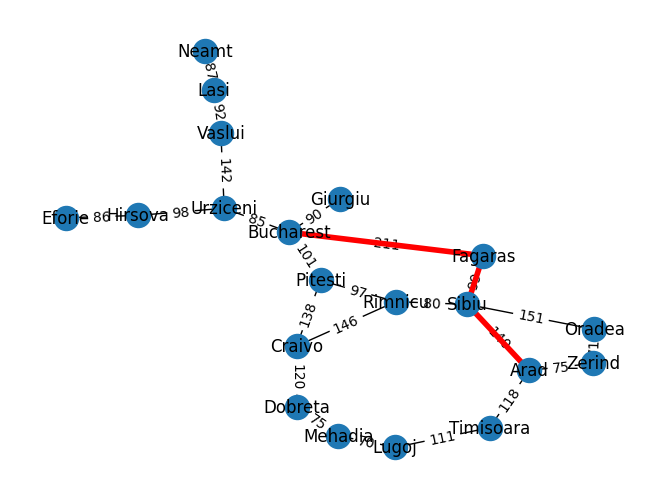

In [9]:
# 5
import networkx as nx
import matplotlib.pyplot as plt

g = {
     'Arad': [('Sibiu', 140), ('Timisoara', 118), ('Zerind', 75)],
     'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu', 80)],
     'Timisoara': [('Arad', 118), ('Lugoj', 111)],
     'Zerind': [('Arad', 75), ('Oradea', 71)],
     'Oradea': [('Zerind', 71), ('Sibiu', 151)],
     'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
     'Rimnicu': [('Sibiu', 80), ('Craivo', 146), ('Pitesti', 97)],
     'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
     'Bucharest': [('Giurgiu', 90), ('Urziceni', 85), ('Pitesti', 101), ('Fagaras', 211)],
     'Craivo': [('Dobreta', 120), ('Pitesti', 138), ('Rimnicu', 146)],
     'Pitesti': [('Rimnicu', 97), ('Craivo', 138), ('Bucharest', 101)],
     'Mehadia': [('Dobreta', 75), ('Lugoj', 70)],
     'Giurgiu': [('Bucharest', 90)],
     'Urziceni': [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
     'Dobreta': [('Mehadia', 75), ('Craivo', 120)],
     'Hirsova' : [('Eforie', 86), ('Urziceni', 98)],
     'Vaslui' : [('Urziceni', 142), ('Lasi', 92)],
     'Eforie' : [('Hirsova', 86)],
     'Lasi': [('Neamt', 87), ('Vaslui', 92)],
     'Neamt': [('Lasi', 87)],
}

# create an empty graph
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(g.keys())

# add edges to the graph
for node, edges in g.items():
    for edge in edges:
        G.add_edge(node, edge[0], weight=edge[1])

# set the positions of the nodes using a layout algorithm
pos = nx.kamada_kawai_layout(G)

# draw the graph
nx.draw(G, pos, with_labels=True)

# add edge weights to the graph
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
path = nx.shortest_path(G, source='Arad', target='Bucharest')
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color='r')

# show the graph
plt.show()



In [10]:
# 6
from collections import deque
from copy import deepcopy

def isValid(board,r,c):
    for i in range(len(board)):
        if board[r][i]==1 and c!=i:
            return False
        if board[i][c]==1 and r!=i:
            return False
        if r+c-i>=0 and r+c-i<len(board) and r!=i:
            if board[i][r+c-i]==1:
                return False
        if i-r+c>=0 and i-r+c<len(board) and r!=i:
            if board[i][i-r+c]==1:
                return False
    return True

def nQueens(n):
    q=deque()
    q.append([[[0 for i in range(n)] for j in range(n)],0])
    while len(q):
        board,lev=q.popleft()
        if lev==n:
            return board
        for i in range(n):
            if board[i][lev]==0:
                board[i][lev]=1
                if isValid(board,i,lev):
                    nboard=deepcopy(board)
                    q.append([nboard,lev+1])
                board[i][lev]=0
nQueens(8)

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0]]